**Predicting Road Accident Risk**

---

https://www.kaggle.com/competitions/playground-series-s5e10

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


# Explorando o conjunto de dados

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [ ]:
df_train.isna().sum()

,0
id,0
road_type,0
num_lanes,0
curvature,0
speed_limit,0
lighting,0
weather,0
road_signs_present,0
public_road,0
time_of_day,0


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


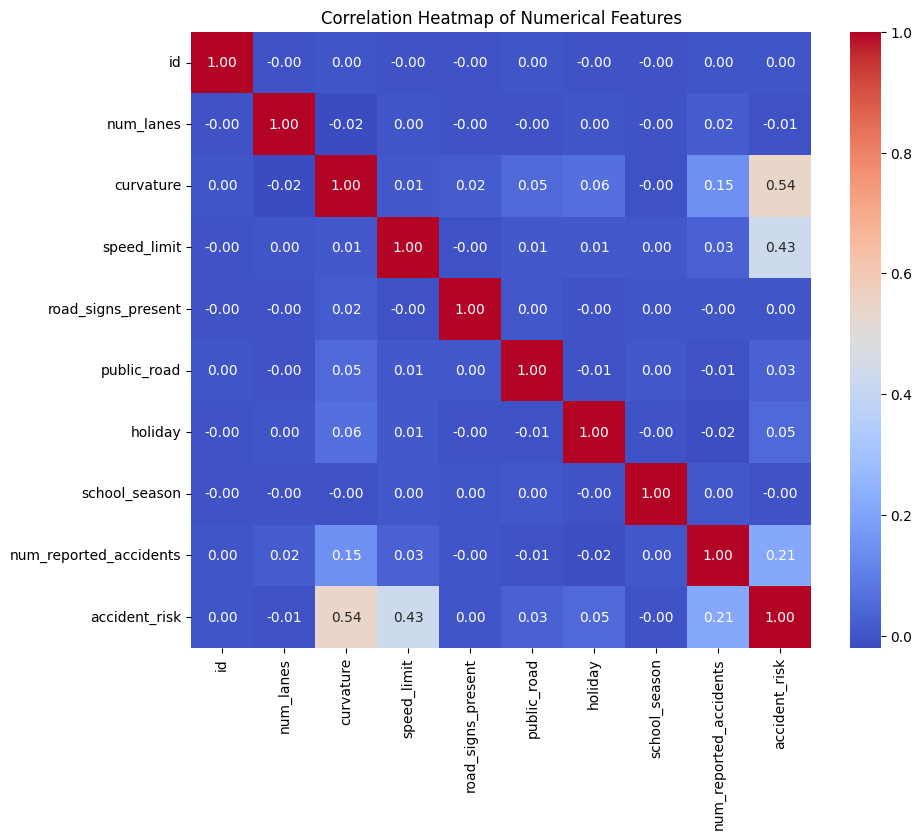

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

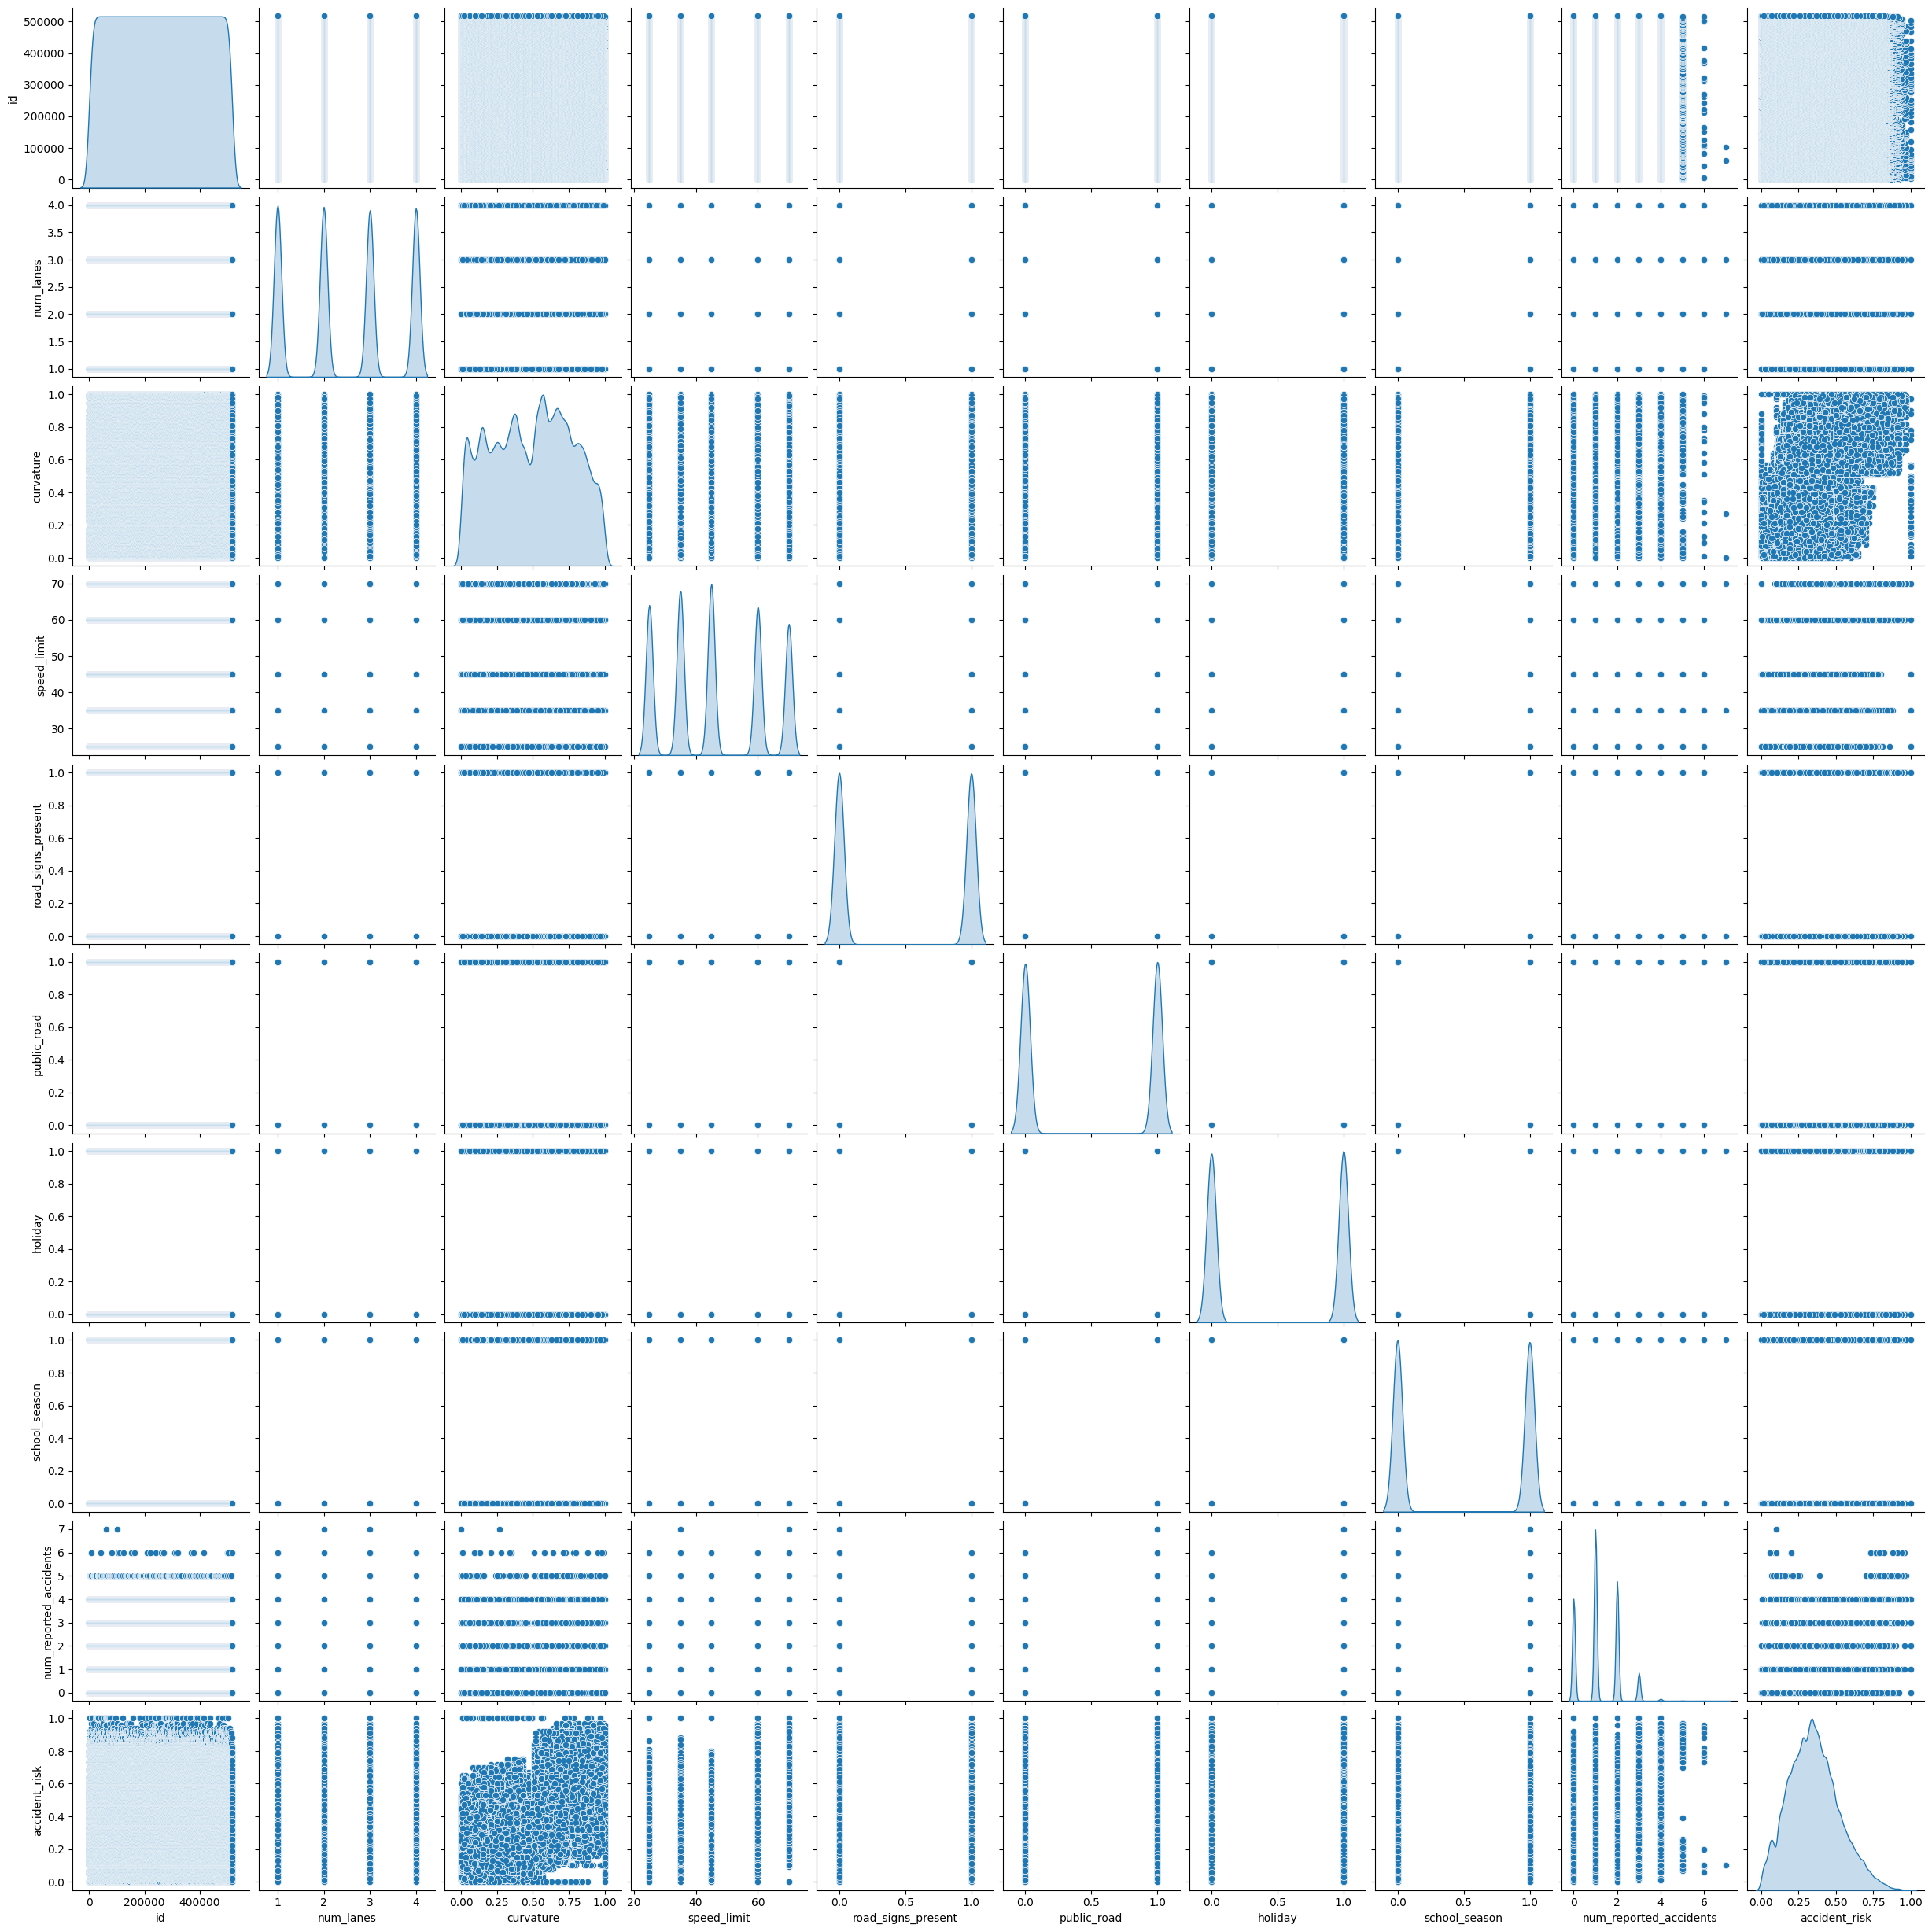

In [ ]:
sns.pairplot(df_train, diag_kind='kde')
plt.show()

# Normalização

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['accident_risk','id'])
y = df_train['accident_risk']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

y_test.dropna(inplace=True)
y_test.isna().sum()

y_train.dropna(inplace=True)
y_train.isna().sum()

np.int64(0)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ("onehot_road_type", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["road_type"]),
        ("onehot_lighting", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["lighting"]),
        ("onehot_weather", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["weather"]),
        ("onehot_time_of_day", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["time_of_day"]),
        ("onehot_road_signs_present", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["road_signs_present"]),
        ("onehot_public_road", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["public_road"]),
        ("onehot_holiday", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["holiday"]),
        ("onehot_school_season", OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ["school_season"]),
        ("std_num_lanes", StandardScaler(), ["num_lanes"]),
        ("std_curvature", StandardScaler(), ["curvature"]),
        ("std_speed_limit", StandardScaler(), ["speed_limit"]),
        ("std_num_reported_accidents", StandardScaler(), ["num_reported_accidents"])
    ]
)

In [ ]:
preprocessor.fit(X_train)

X_train_transform = preprocessor.transform(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train_transform, columns=feature_names,  index=X_train.index)
display(X_train.describe())

X_test_transform = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
X_test = pd.DataFrame(X_test_transform, columns=feature_names,index=X_test.index)

,onehot_road_type__road_type_highway,onehot_road_type__road_type_rural,onehot_road_type__road_type_urban,onehot_lighting__lighting_daylight,onehot_lighting__lighting_dim,onehot_lighting__lighting_night,onehot_weather__weather_clear,onehot_weather__weather_foggy,onehot_weather__weather_rainy,onehot_time_of_day__time_of_day_afternoon,...,onehot_public_road__public_road_False,onehot_public_road__public_road_True,onehot_holiday__holiday_False,onehot_holiday__holiday_True,onehot_school_season__school_season_False,onehot_school_season__school_season_True,std_num_lanes__num_lanes,std_curvature__curvature,std_speed_limit__speed_limit,std_num_reported_accidents__num_reported_accidents
count,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,...,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,388315.000000,3.883150e+05,3.883150e+05,3.883150e+05,3.883150e+05
mean,0.335617,0.332995,0.331388,0.344102,0.354202,0.301696,0.346296,0.350375,0.303328,0.331661,...,0.498011,0.501989,0.495968,0.504032,0.502499,0.497501,-1.044639e-16,-1.897879e-16,2.266037e-16,-1.294042e-16
std,0.472206,0.471285,0.470713,0.475075,0.478271,0.458995,0.475790,0.477088,0.459696,0.470811,...,0.499997,0.499997,0.499984,0.499984,0.499994,0.499994,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.333303e+00,-1.794442e+00,-1.337423e+00,-1.325819e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.333303e+00,-8.397116e-01,-7.044334e-01,-2.099906e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-4.410205e-01,7.829861e-02,-7.144373e-02,-2.099906e-01
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.343544e+00,8.127068e-01,8.780408e-01,9.058378e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.343544e+00,1.877599e+00,1.511030e+00,6.484980e+00


In [ ]:
X_train.dropna(inplace=True)

# Testando a performance de 4 (quatro) modelos.
- RandomForest
- LightGBM
- SVM
- MLP

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,root_mean_squared_error
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,3, 5, 7],
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=3
)

grid_search.fit(X_train, y_train)

# 8️⃣ Melhor combinação encontrada
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (validação cruzada):", grid_search.best_score_)

# 9️⃣ Avaliar no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nRMSE:\n", root_mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'max_depth': 7, 'n_estimators': 100}
Melhor score (validação cruzada): -0.05672106672733614

RMSE:
 0.0569397763584729


In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# 8️⃣ Melhor combinação encontrada
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (validação cruzada):", grid_search.best_score_)

# 9️⃣ Avaliar no conjunto de teste
best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)

print("\nRMSE:\n", root_mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 388315, number of used features: 24
[LightGBM] [Info] Start training from score 0.352607
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Melhor score (validação cruzada): -0.05611276800962871

RMSE:
 0.05630231678248828


In [ ]:
from sklearn.svm import SVR

svm = SVR()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# 8️⃣ Melhor combinação encontrada
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (validação cruzada):", grid_search.best_score_)

# 9️⃣ Avaliar no conjunto de teste
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print("\nRMSE:\n", root_mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


# Selecionando o melhor modelo do passo anterior e gerando o arquivo para submission

In [31]:
submission_df = preprocessor.transform(df_test)

y_pred = best_lgbm.predict(submission_df)

final = pd.DataFrame({
    'id': df_test['id'],
    'accident_risk': y_pred
})

final.to_csv('submission.csv', index=False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
